In [1]:
import importlib
import kagglehub
import glob
import os
import pandas as pd
import numpy as np
#from ucimlrepo import fetch_ucirepo 
from sklearn import svm
from tqdm import tqdm
#from skopt import BayesSearchCV

#from skopt.space import Real, Integer
# from skopt.plots import plot_objective, plot_histogram
# from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier

import openml
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from scipy.stats import uniform, randint
import random
import csv
import ast
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/Users/polamoscicka/anaconda3/envs/envauto/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pakietAutoML.automl_functions import *
from pakietAutoML.modul1 import *
from pakietAutoML.model_selection import *
from pakietAutoML.load_models import *
from generate_raport import *

from automl_functions import (
    plot_class_balance,
    plot_feature_importance,
    random_search_tuning,
    plot_roc_auc,
    plot_confusion_matrix,
    data_overview,
)

In [3]:
path1 = kagglehub.dataset_download("prishasawhney/mushroom-dataset")
path2 = kagglehub.dataset_download("devzohaib/mushroom-edibility-classification")
path4 = kagglehub.dataset_download("uciml/mushroom-classification")
data1 = pd.read_csv(f"{path1}/mushroom_cleaned.csv")
data2 = pd.read_csv(f"{path2}/secondary_data.csv", delimiter=";")
data4 = pd.read_csv(f"{path4}/mushrooms.csv") 

In [4]:
y1 = data1["class"]
X1 = data1.drop("class", axis=1)
y2 = data2["class"]
X2 = data2.drop("class", axis=1)
y2 = y2.map({'p': 1, 'e': 0})
y4 = data4["class"]
X4 = data4.drop("class", axis=1)
y4 = y4.map({'p': 1, 'e': 0})

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=0)

In [6]:
X_train1_or, X_test1_or, y_train1_or, y_test1_or= X_train1, X_test1, y_train1, y_test1 
X_train2_or, X_test2_or, y_train2_or, y_test2_or= X_train2, X_test2, y_train2, y_test2
X_train4_or, X_test4_or, y_train4_or, y_test4_or= X_train4, X_test4, y_train4, y_test4


In [7]:
X_train1, sf1 = prep(X_train1, y_train1)
X_train2, sf2 = prep(X_train2, y_train2)
X_train4, sf4 = prep(X_train4, y_train4)
X_test1 = prep(X_test1, mode='test', features=sf1)
X_test2 = prep(X_test2, mode='test', features=sf2)
X_test4 = prep(X_test4, mode='test', features=sf4)

In [8]:
X_train=X_train2.head(30)
X_test=X_test2.head(20)
y_train=y_train2.head(30)
y_test=y_test2.head(20)
X_train_or=X_train2_or
y_train_or=y_train2_or

Pakiet AutoML dla grzybiarzy
Analizowane są zbiory danych z podziałem na klasy 0 lub 1, gdzie 0 oznacza jadalny gdzyb, a 1 trujący.
Analiza danych:
Liczba wierszy: 45801
Liczba kolumn: 20
Liczba zmiennych kategorycznych: 17
Liczba zmiennych numerycznych: 3
Nie ma braków danych.
Balans klas:


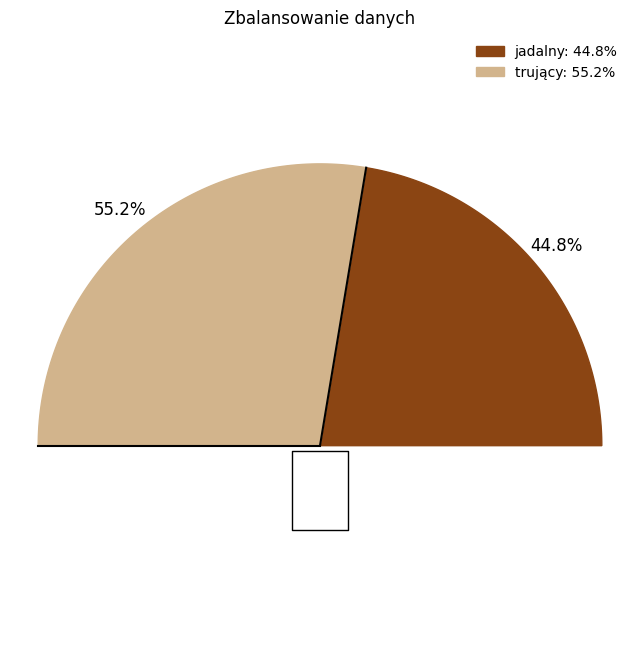

Zbiór jest zbalansowany.
Preprocessing: TODO
Ważność cech:
Łącznie wybrano 10 cech.
Wybrane cechy:
Index(['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_x',
       'cap-surface_t', 'does-bruise-or-bleed_t', 'gill-color_w',
       'gill-color_y', 'stem-surface_s', 'stem-color_w'],
      dtype='object')
Analiza jakości modeli i konfiguracja finalnego komitetu:
1. Miara oceny modeli:
   Do analizy jakości modeli wykorzystano kombinację ważonych miar ROC AUC oraz Recall:
   Custom Score = (Recall: 0.3, ROC AUC: 0.7)

2. Modele użyte w analizie: KNeighborsClassifier, GradientBoostingClassifier, RandomForestClassifier, LogisticRegression

3. Optymalizacja parametrów:
   Dla każdego z modeli, przy użyciu metody RandomizedSearch, dobrano najlepsze zestawy hiperparametrów.

4. Finalny komitet modeli:
   Modele z optymalnymi parametrami zostały połączone w komitet VotingClassifier, reprezentujący finalny model.

5. Parametry finalnego modelu:
VotingClassifier(estimators=[('KNeighborsCla

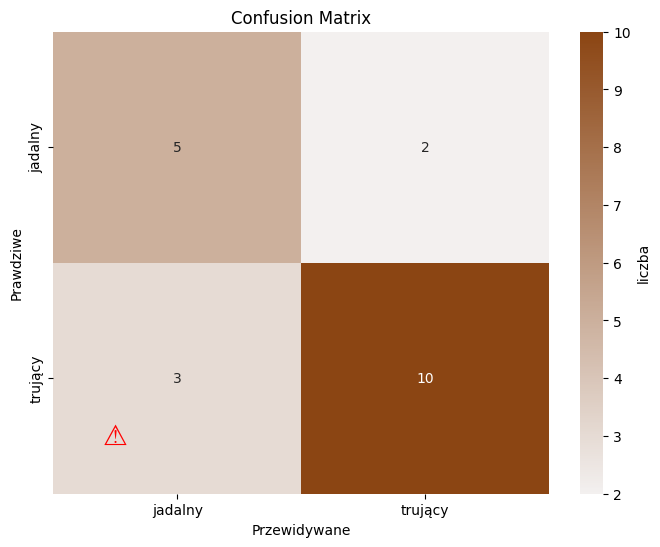

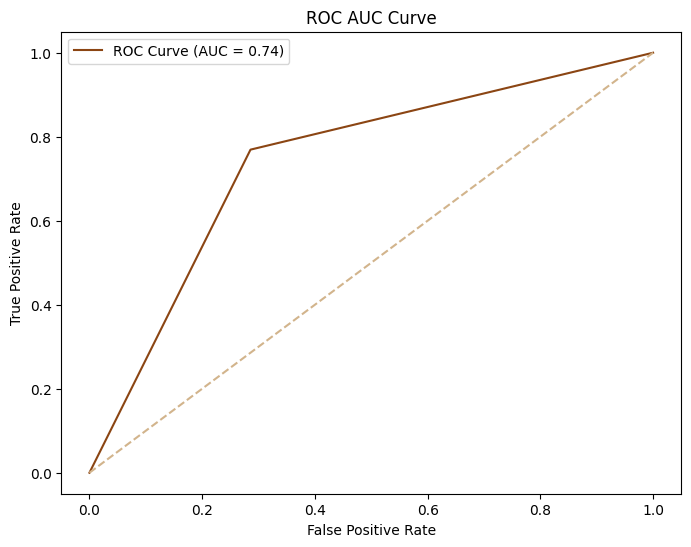

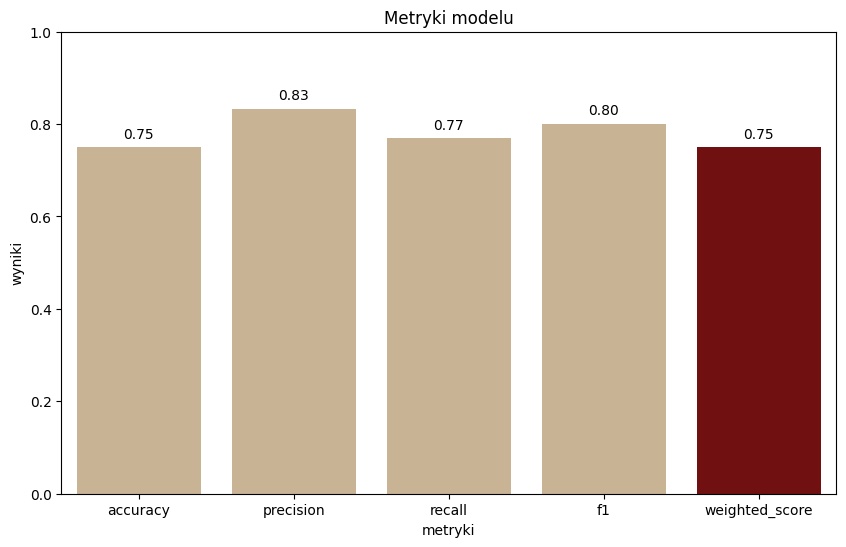

Model osiągnął niską dokładność (<80%).
Może być ryzykowny w praktycznym zastosowaniu i wymaga optymalizacji.

Czułość modelu jest niska (<80%).
Model może pomijać zbyt wiele trujących grzybów, co stanowi poważne zagrożenie.

Model ma dobrą precyzję (>80%),
ale może zdarzyć się, że niektóre jadalne grzyby zostaną niesłusznie oznaczone jako trujące.

Wynik F1 modelu jest niski (<80%).
Model może mieć trudności z osiągnięciem dobrej równowagi między precyzją i czułością.

W przypadku klasyfikacji grzybów kluczowe znaczenie ma czułość (sensitivity/recall),
ponieważ pomyłka w postaci zaklasyfikowania trującego grzyba jako jadalny
może prowadzić do poważnych konsekwencji zdrowotnych.
Dlatego model powinien być zoptymalizowany pod kątem minimalizacji tego ryzyka.



In [9]:
generate_raport(X_train, y_train, X_test, y_test, X_train_or, y_train_or)